---
title: Predicting Medical Costs - A Regression Problem
author: Patrick Linke
date: 2025-10-26
categories: ["Regression", "Medicine"]
execute: false
---

![](images/medical_costs_cover.png)

# Introduction

## 1. Key Results

- *Charges generally rise with age.*
- *Smokers consistently have higher and more variable charges than non-smokers.*

![Fig. 0 Showing the most important features identified by a Decision Tree Regressor.](images/Decision_Tree_plot_small.png)

In [429]:
#| echo: false

import pandas as pd
pd.read_csv("data/model_comparison_metrics.csv")

,Models,MAE,MSE,RMSE,R2
0,LinearRegression,4092.36,31333268.50,5597.61,0.79
1,SVR,3373.30,37706594.68,6140.57,0.75
2,DecisionTreeRegressor,2755.59,21655894.86,4653.59,0.86
3,RandomForestRegressor,2459.69,18958974.55,4354.19,0.88


## 2. Why It Matters

Predicting medical costs isn’t just a math problem — it’s about understanding the real price of our health choices. For insurers, these predictions guide fairer pricing and risk assessment. For individuals, they reveal how habits like smoking or maintaining a healthy BMI can shape future expenses. In a world where healthcare costs can make or break financial stability, this kind of model helps turn data into smarter, more informed decisions.

## 3. The Data

The dataset comes from the [Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) on Kaggle, containing **1,338 observations**, each representing a single U.S. health insurance policyholder. Key features include **age**, **sex**, **BMI**, **number of children**, **smoker status**, and **region**. The **target variable**, *charges*, captures each person’s annual medical cost, ranging from about $1,000 to over $60,000. Despite its small size, the dataset offers rich insights into how lifestyle and demographics drive healthcare expenses.

![Fig. 1 Shows the Distribution of Numeric Features in the Medical Costs Dataset](images/numeric_dist_histplot.png)

![Fig. 2 Shows the Distribution of Categorical Features in the Medical Costs Dataset](images/cat_dist_histplot.png)

# Methods & Results

## 4. What I Did

Explored the medical cost dataset with visuals — distributions, correlations, and feature effects — to link age, BMI, and smoking to charges. Cleaned numeric features with StandardScaler and categorical variables with OneHotEncoder.
Trained LinearRegression, SVR, DecisionTreeRegressor, and RandomForestRegressor, tuning hyperparameters with RandomizedSearchCV. Evaluated MAE, MSE, RMSE, and R² on the test set and compared models visually.

## 5. What I Found




Insurance charges tend to increase with age. Smokers have significantly higher and more variable charges compared to non-smokers, whose costs show a smoother, more consistent trend.  
Among smokers, insurance charges generally increase with higher BMI, while BMI has little impact on costs for non-smokers. Within non-smokers, age drives costs.

Feature importance analysis (from the tree-based models) highlighted smoking, age, and BMI as the top predictors — confirming both domain expectations and model consistency.

The Random Forest Regressor achieved the best results, with the lowest RMSE (≈ 4354) and highest R² (≈ 0.88), indicating strong predictive accuracy and generalization on unseen data, showing that it is possible to predict medical costs based on key personal and lifestyle factors. This demonstrates that data-driven models can effectively capture the underlying relationships between health behaviors and medical expenses, enabling more accurate cost forecasting and better-informed healthcare and policy decisions.

![Fig. 3 Charges increase with age, and smokers have significantly higher and more variable charges than non-smokers.](images/age_vs_charges.png)

![Fig. 4 Smokers consistently have higher charges than non-smokers. Among smokers, charges increase strongly with BMI (r ≈ 0.81), while among non-smokers, BMI has almost no relationship with charges (r ≈ 0.08). This indicates a strong interaction effect — smoking amplifies the impact of BMI on charges.](images/bmi_vs_charges.png)


![Fig. 5  Decision tree regression model predicting medical insurance charges. The model splits data points into groups based on key factors. The most important splitting criterion is smoking status. Among non-smokers, age is the most influential variable, while for smokers, BMI plays the dominant role. The “value” shown in each node represents the model’s predicted target value (here, the estimated insurance cost in dollars).](images/Decision_Tree_plot.png)

![Fig. 6 Comparison of Root Mean Squared Error (RMSE) values for different regression models on the test set. The RMSE measures the average magnitude of prediction errors, with lower values indicating better model performance. The Random Forest Regressor achieved the lowest RMSE, followed by the Decision Tree Regressor, while the SVR and Linear Regression models showed higher error levels, suggesting less accurate predictions.)](images/RMSE_score.png)

![Fig. 7 Comparison of R² scores for different regression models on the test set. The R² score represents the proportion of variance in medical insurance charges explained by each model. Higher values indicate better predictive performance. The Random Forest Regressor achieved the highest R², followed closely by the Decision Tree Regressor, while Linear Regression and SVR showed comparatively lower explanatory power.](images/R2_score.png)

# Conclusion

## 6. What I Learned

Model performance improved with complexity:  
Tree-based models, especially Random Forest, captured the nonlinear impact of health and lifestyle factors most effectively. The findings align with real-world intuition — smokers and older individuals face substantially higher insurance costs.

## 7. What’s Next

This project shows that predicting medical costs is possible — but there’s room to grow. Future work could explore more advanced models like Gradient Boosting or XGBoost to see if they capture even subtler patterns in the data. Another direction is adding richer features to improve model depth and realism. Finally, scaling this work to larger, more diverse datasets would help assess how well these findings hold up across different populations. The next steps are open — it’s up to you to take this foundation and push it further.

# Credits

You can find the Notebook here: [https://github.com/PatrickDdx/Intelligent-Machines](https://github.com/PatrickDdx/Intelligent-Machines)

Inspired by Chapter 2 from [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/)

---

---

# Behind The Scenes (My Code)

In [332]:
#| echo: false

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingRegressor

In [295]:
#| echo: false
# extra code – code to save the figures as high-res PNGs

from pathlib import Path

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [139]:
#| echo: false

# set seaborn style

sns.set_theme(style="whitegrid", font_scale=1.2)

Loading the data and checking out the first 5 rows

In [5]:
df = pd.read_csv("data/insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA

Checking the structure of the DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Checking for missing values

In [7]:
# -> no missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Creating a new column with catrgorical BMI features

BMI Categories

| BMI Category | BMI Range |
| :--- | :--- |
| Underweight | Below 18.5 |
| Healthy | 18.5 – 24.9 |
| Overweight | 25.0 – 29.9 |
| Obesity | 30.0 or above |

In [157]:
bins = [0, 18.5, 25, 30, float("inf")]
labels = ["underweight", "normal", "overweight", "obese"]

df["BMI_category"] = pd.cut(df["bmi"], bins=bins, labels=labels, right=False)

Plotting the distribution of the numeric columns

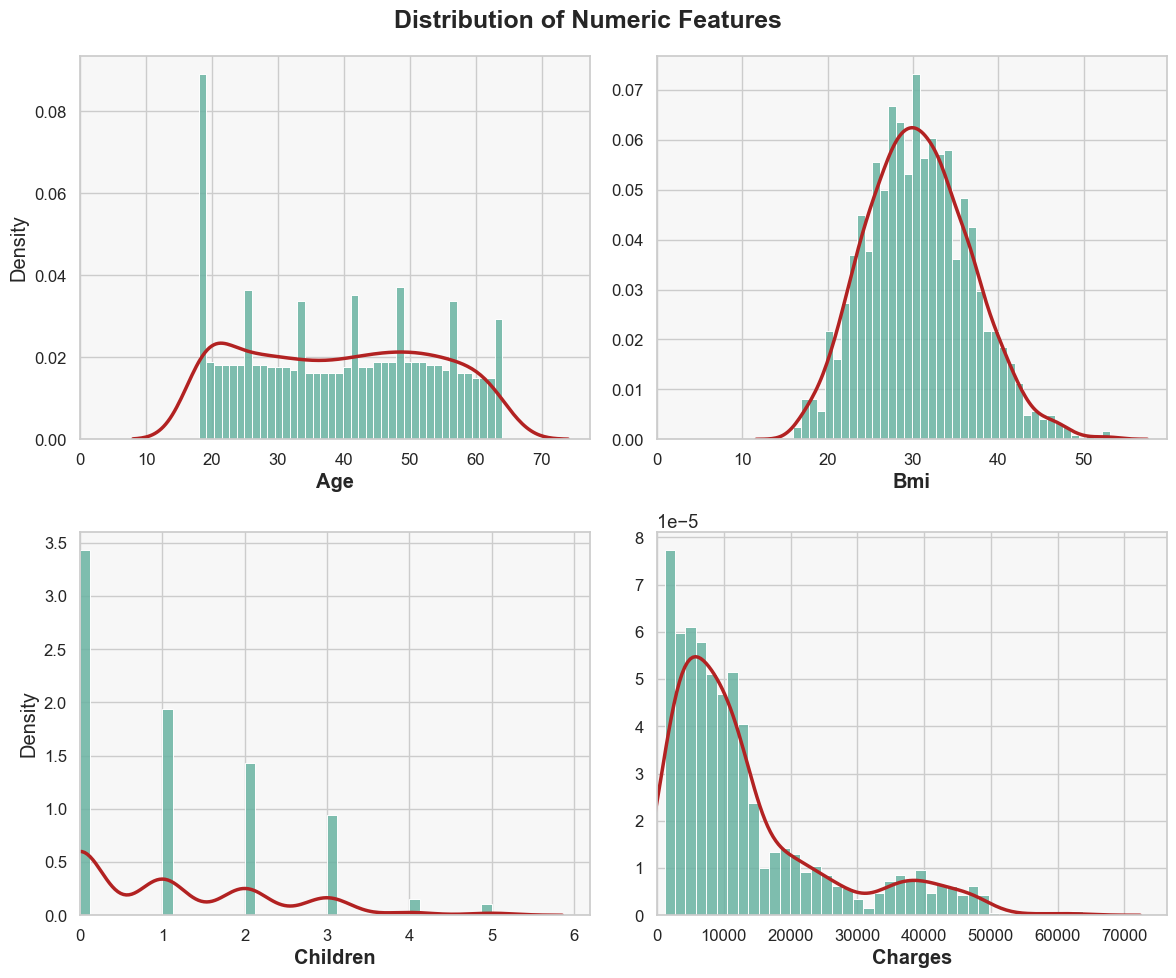

In [135]:
numeric_columns = ['age', 'bmi', 'children', 'charges']

fig, axes = plt.subplots(2, 2, figsize=(12,10), sharey=False)
fig.suptitle("Distribution of Numeric Features", fontsize=18, weight="bold")

R, C = axes.shape

for k, (ax, col) in enumerate(zip(axes.flat, numeric_columns)):

    j = k % C # 0 % 2 = 0; 1%2 = 1

    sns.histplot(
        data=df,
        x=col,
        bins=40,
        ax=ax,
        stat="density",
        color="#69b3a2",
        edgecolor="white",
        alpha=0.85,
    )
    sns.kdeplot(
        data=df,
        x=col,
        ax=ax,
        color="#b22222",
        linewidth=2.5,
    )

    #ax.set_title(col.capitalize(), fontsize=14, weight="semibold")
    ax.set_xlabel(col.capitalize(), weight="semibold")
    ax.set_ylabel("Density" if j == 0 else "")
    ax.set_xlim(left=0)
    ax.tick_params(axis="both", labelsize=12)

    ax.set_facecolor("#f7f7f7")

fig.tight_layout(pad=1.5)

save_fig("numeric_dist_histplot")

Plotting the distribution of categorical columns

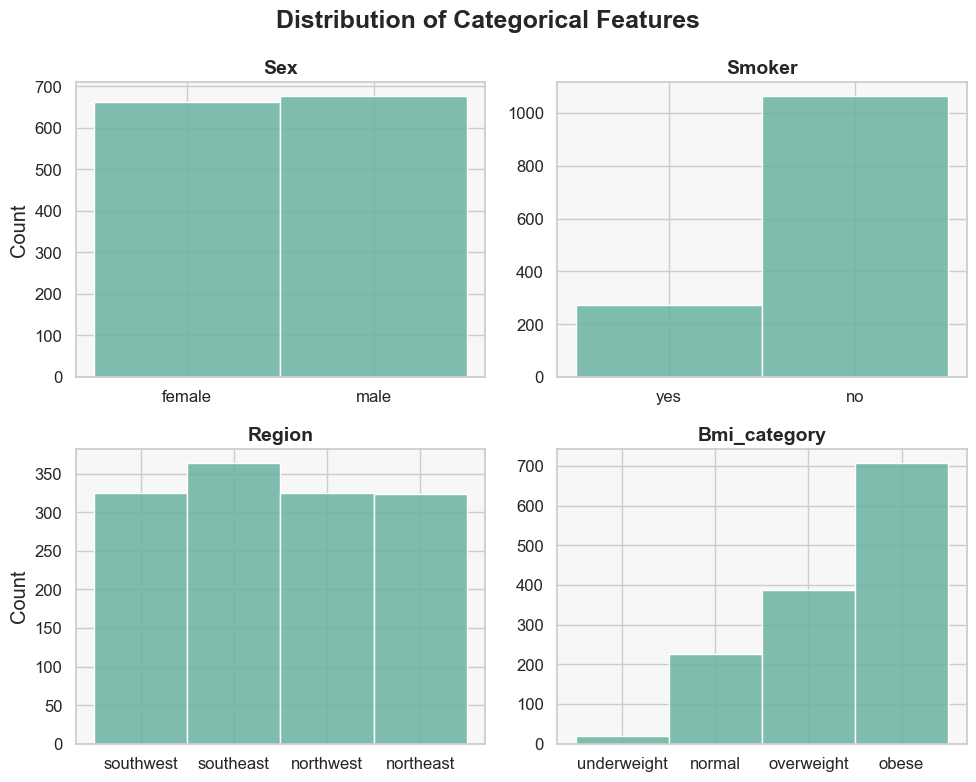

In [138]:
categorial_columns = ['sex', 'smoker', 'region', 'BMI_category']

fig, axes = plt.subplots(2, 2, figsize=(10,8), sharey=False)
fig.suptitle("Distribution of Categorical Features", fontsize=18, weight="bold")

R, C = axes.shape

for k, (ax, col) in enumerate(zip(axes.flat, categorial_columns)):

    j = k % C

    sns.histplot(
        data=df,
        x=col,
        bins=40,
        ax=ax,
        stat="count",
        color="#69b3a2",
        edgecolor="white",
        alpha=0.85,
    )

    ax.set_title(col.capitalize(), fontsize=14, weight="semibold")
    ax.set_xlabel("")
    ax.set_ylabel("Count" if j == 0 else "")
    ax.tick_params(axis="both", labelsize=12)

    ax.tick_params(axis="both", labelsize=12)

    ax.set_facecolor("#f7f7f7")

fig.tight_layout(pad=1.5)

save_fig("cat_dist_histplot")

In [39]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [40]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [38]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [142]:
df["BMI_category"].value_counts()

BMI_category
obese          707
overweight     386
normal         225
underweight     20
Name: count, dtype: int64

Taking a look at the target variable

In [4]:
df["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

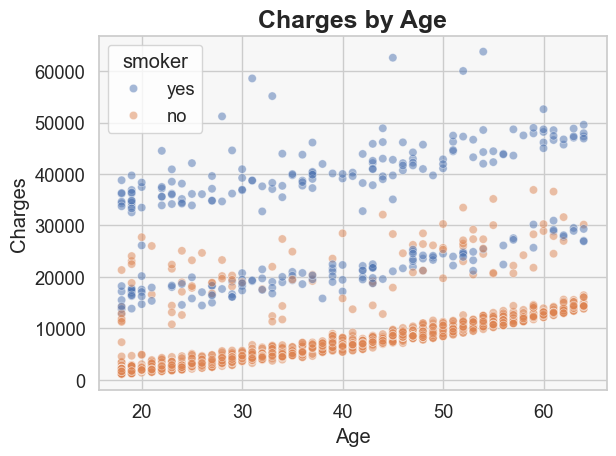

In [185]:
# Insights:
# Charges generally rise with age
# Smokers have higher charges than non-smokers
# Smokers not only have higher average charges, but their costs are much more spread out
# non-smokers trend is smoother

sns.scatterplot(df, x="age", y="charges", alpha=0.5, hue="smoker")
plt.title("Charges by Age", fontsize=18, weight="bold")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(loc="best", title="smoker")

ax = plt.gca()
ax.set_facecolor("#f7f7f7")
plt.tight_layout()

save_fig("age_vs_charges")

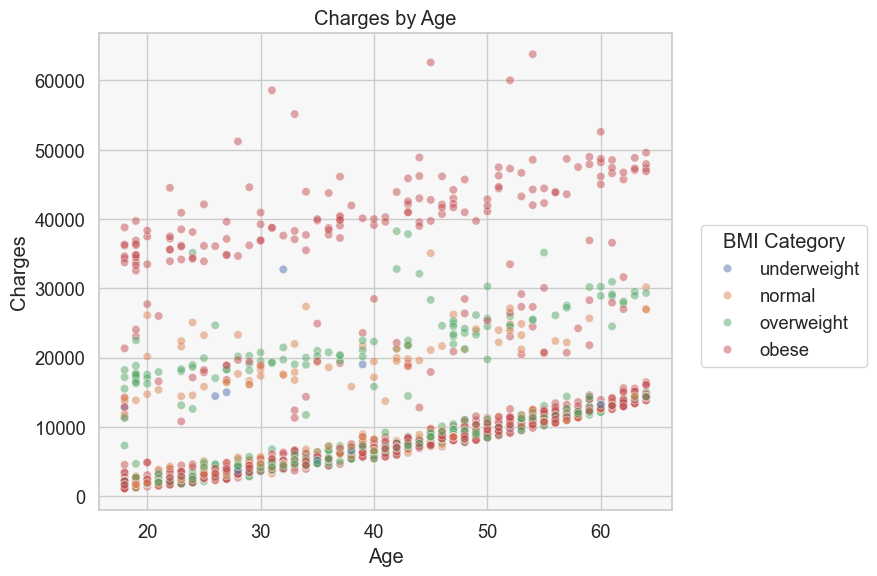

In [ ]:
# Insights
# Charges increase with age across all BMI categories.
# However, BMI category alone does not create clear separation in charges — there’s considerable overlap between normal, overweight, and obese groups.
# The large vertical gaps between charge levels likely stem from other variables (e.g., smoking).
# Overall, BMI has a smaller impact on charges than age or smoking status.


plt.figure(figsize=(9,6))
sns.scatterplot(df, x="age", y="charges", alpha=0.5, hue="BMI_category")
plt.title("Charges by Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(loc=[1.05, 0.3], title="BMI Category")

ax = plt.gca()
ax.set_facecolor("#f7f7f7")

plt.tight_layout()

save_fig("age_vs_charges_bmi")

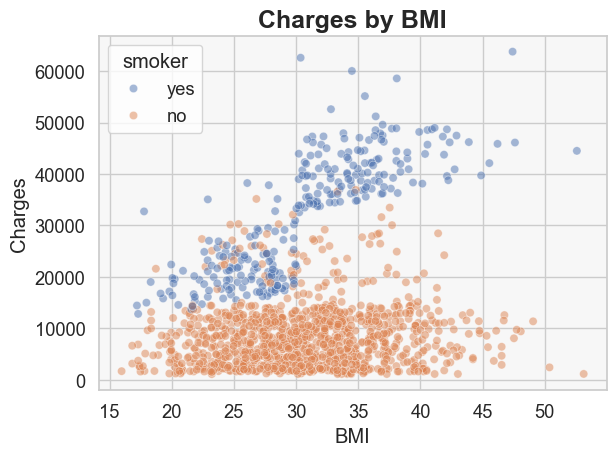

In [ ]:
# Insights:
# For somkers Charges generally rise with BMI
# Smokers have higher charges than non-smokers
# For non-smokers bmi has little effect

sns.scatterplot(df, x="bmi", y="charges", alpha=0.5, hue="smoker") # higher BMI -> higher charges
plt.title("Charges by BMI", fontsize=18, weight="bold")
plt.xlabel("BMI")
plt.ylabel("Charges")

plt.legend(loc="best", title="smoker")

ax = plt.gca()
ax.set_facecolor("#f7f7f7")
plt.tight_layout()

save_fig("bmi_vs_charges")

Check the correlation between Smoking and BMI on the charges

In [188]:
df[df.smoker=="yes"].charges.corr(df[df.smoker=="yes"].bmi)


0.8064806070155408

In [189]:
df[df.smoker=="no"].charges.corr(df[df.smoker=="no"].bmi)

0.08403654312833271

In [183]:
# Insights:
# Charges strongly correlate to being a smoker
# Age and BMI follow respectively

df["smoker_flag"] = df["smoker"].map({"yes": 1, "no": 0})
df["sex_flag"] = df["sex"].map({"female": 0, "male": 1})
df.corr(numeric_only=True)["charges"].sort_values(ascending=False)

charges        1.000000
smoker_flag    0.787251
age            0.299008
bmi            0.198341
children       0.067998
sex_flag       0.057292
Name: charges, dtype: float64

## Preprocessing

In [193]:
df = pd.read_csv("data/insurance.csv")

In [194]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [195]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="if_binary"))
])

In [196]:
from sklearn.compose import ColumnTransformer, make_column_selector


preprocessing = ColumnTransformer([
    ("num", num_pipeline, make_column_selector(dtype_include=np.number)),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
])

In [239]:
tree_num_pipeline = Pipeline([
   ("imputer", SimpleImputer(strategy="median")) 
])

tree_preprocessing = ColumnTransformer([
    ("num", tree_num_pipeline, make_column_selector(dtype_include=np.number)),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
])

### Train Test Split

In [197]:
X = df.drop("charges", axis=1)

In [198]:
y = df["charges"]

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
print(f"X_train: {X_train.shape}; y_train: {y_train.shape}\nX_test: {X_test.shape}; y_test: {y_test.shape}")

X_train: (1137, 6); y_train: (1137,)
X_test: (201, 6); y_test: (201,)


## Training a Model

In [201]:
def metrics(y_true, y_pred):
    MAE = mean_absolute_error(y_true, y_pred)
    print(f"MAE: {MAE}")

    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    print(f"MSE: {MSE}\nRMSE: {RMSE}")

### LinearRegression

In [202]:
linear_reg = make_pipeline(preprocessing, LinearRegression())

In [205]:
linear_reg_score = -cross_val_score(linear_reg, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")

In [206]:
pd.Series(linear_reg_score).describe()

count       5.000000
mean     6173.951563
std       211.241338
min      5926.581771
25%      6070.880265
50%      6156.104487
75%      6219.280117
max      6496.911172
dtype: float64

### SVR

In [209]:
svr_model = make_pipeline(preprocessing, SVR())

In [210]:
svr_score = -cross_val_score(svr_model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")

In [211]:
pd.Series(svr_score).describe()

count        5.000000
mean     12595.037950
std       1099.948405
min      11392.920185
25%      11770.593709
50%      12616.341217
75%      13004.470299
max      14190.864341
dtype: float64

In [222]:
param_grid = {
    "svr__C": [0.1, 1, 10, 1000],
    "svr__gamma": ['scale', 'auto', 0.01, 0.1, 1],
    "svr__kernel": ['rbf', 'linear'],
    "svr__epsilon": [0.01, 0.1, 0.5]
}

svr_tuned = RandomizedSearchCV(svr_model, param_distributions=param_grid, cv=3, n_iter= 100, scoring="neg_root_mean_squared_error", random_state=42, n_jobs=-1, verbose=3)

svr_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x00000269773A09B0>),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_...
                                                                                                OneHotEncoder(drop='if_binary'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x00000269773A2780>)])),
                                             ('svr', SVR())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'svr__C': [0.1, 1, 10, 1000],
                                        'svr__epsilon': [0.01, 0.1, 0.5],
                                        'svr__gamma': ['scale', 'auto', 0.01,
                                                       0.1, 1],
                                        'svr__kernel': ['rbf', 'linear']},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=3)

In [225]:
svr_score = -svr_tuned.best_score_
svr_score

7333.541404442819

In [224]:
svr_tuned.best_params_

{'svr__kernel': 'linear',
 'svr__gamma': 'scale',
 'svr__epsilon': 0.01,
 'svr__C': 1000}

### DecisionTree

Using a simple DecisionTree as a baseline

In [240]:
dt = make_pipeline(tree_preprocessing, DecisionTreeRegressor(max_depth=3))
dt.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000269760A4AD0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002696F9D7DA0>)])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=3))])

In [271]:
base_decision_tree_score = -cross_val_score(dt, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")

In [272]:
pd.Series(base_decision_tree_score).describe()

count       5.000000
mean     4869.172374
std       295.376724
min      4446.480626
25%      4768.196718
50%      4829.922649
75%      5142.062041
max      5159.199837
dtype: float64

Using RandomizedSearch to find the best parameters for the Decisiontree

In [315]:
param_grid = {
    "decisiontreeregressor__max_depth": range(2,20),
    "decisiontreeregressor__min_samples_split": range(2,10),
    "decisiontreeregressor__min_samples_leaf": range(1,10),
    "decisiontreeregressor__max_features": ["sqrt", "log2", None]
}

rnd_decision_tree = RandomizedSearchCV(dt, param_distributions=param_grid, n_iter=100, cv=3, scoring="neg_root_mean_squared_error", random_state=42)

rnd_decision_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x00000269760A4AD0>),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHot...
                                             ('decisiontreeregressor',
                                              DecisionTreeRegressor(max_depth=3))]),
                   n_iter=100,
                   param_distributions={'decisiontreeregressor__max_depth': range(2, 20),
                                        'decisiontreeregressor__max_features': ['sqrt',
                                                                                'log2',
                                                                                None],
                                        'decisiontreeregressor__min_samples_leaf': range(1, 10),
                                        'decisiontreeregressor__min_samples_split': range(2, 10)},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [316]:
rnd_decision_tree.best_params_

{'decisiontreeregressor__min_samples_split': 4,
 'decisiontreeregressor__min_samples_leaf': 9,
 'decisiontreeregressor__max_features': None,
 'decisiontreeregressor__max_depth': 4}

In [317]:
-rnd_decision_tree.best_score_

4770.267010134789

In [318]:
rnd_decision_tree.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002694062E750>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000026976C13410>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=4, min_samples_leaf=9,
                                       min_samples_split=4))])

In [319]:
decision_tree_score = -cross_val_score(rnd_decision_tree.best_estimator_, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")

In [320]:
pd.Series(decision_tree_score).describe()

count       5.000000
mean     4752.431458
std       311.946236
min      4308.317556
25%      4619.560739
50%      4755.759409
75%      4969.267050
max      5109.252536
dtype: float64

In [278]:
best_tree = rnd_decision_tree.best_estimator_["decisiontreeregressor"]
best_tree

DecisionTreeRegressor(max_depth=4, min_samples_leaf=9, min_samples_split=4)

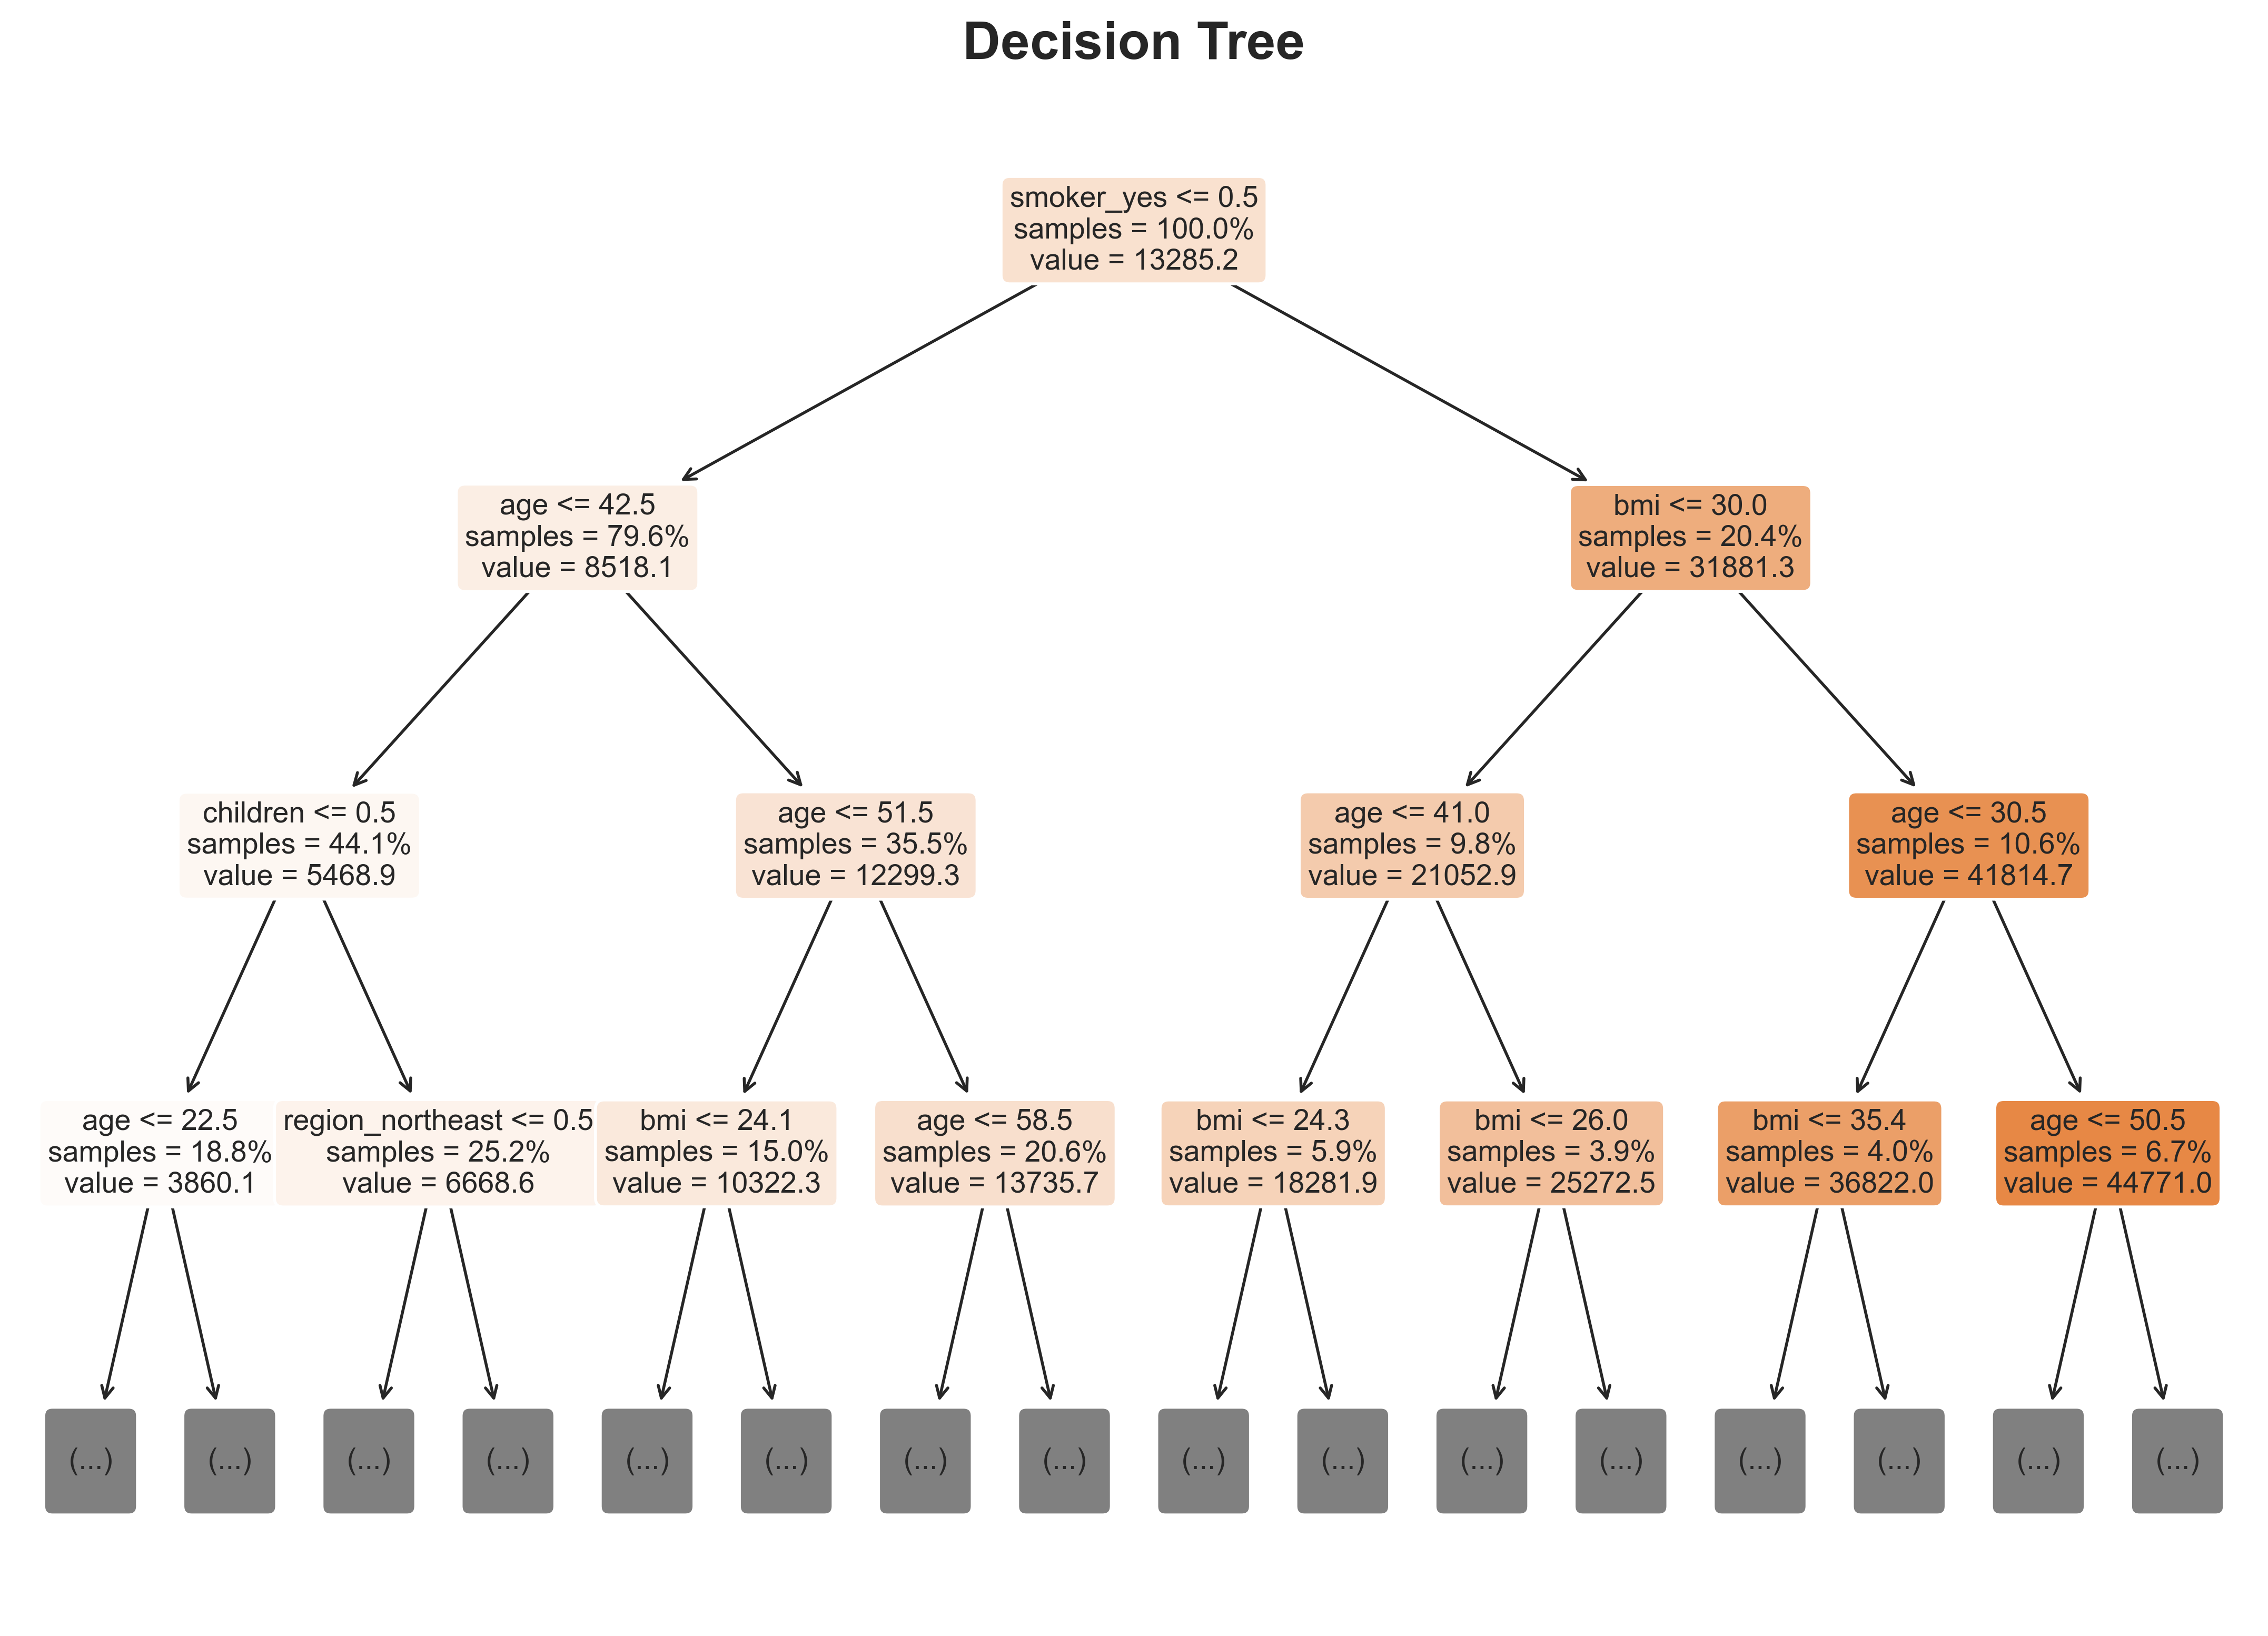

In [297]:
# Insights:
# First splits on smoking ->  confirming smoking dominates the cost signal
# For the smokers, BMI is the next important factor
# For non-smokers age is the next important factor


feature_names = rnd_decision_tree.best_estimator_["columntransformer"].get_feature_names_out()
pretty_names = [f.split("__")[-1] for f in feature_names]


fig, ax = plt.subplots(figsize=(11, 8), dpi=400)

plot_tree(
     best_tree,
     max_depth=3,
     feature_names=pretty_names,
     filled=True,
     rounded=True,
     fontsize=10,
     proportion=True, # show % of samples instead of counts
     impurity=False, # hide squared_error
     precision=1, # shorter numbers
     ax=ax
     
)

plt.title("Decision Tree", fontsize=18, weight="bold")
plt.tight_layout()

save_fig("Decision_Tree_plot", resolution=400)


Smaller iamges for the Blog:

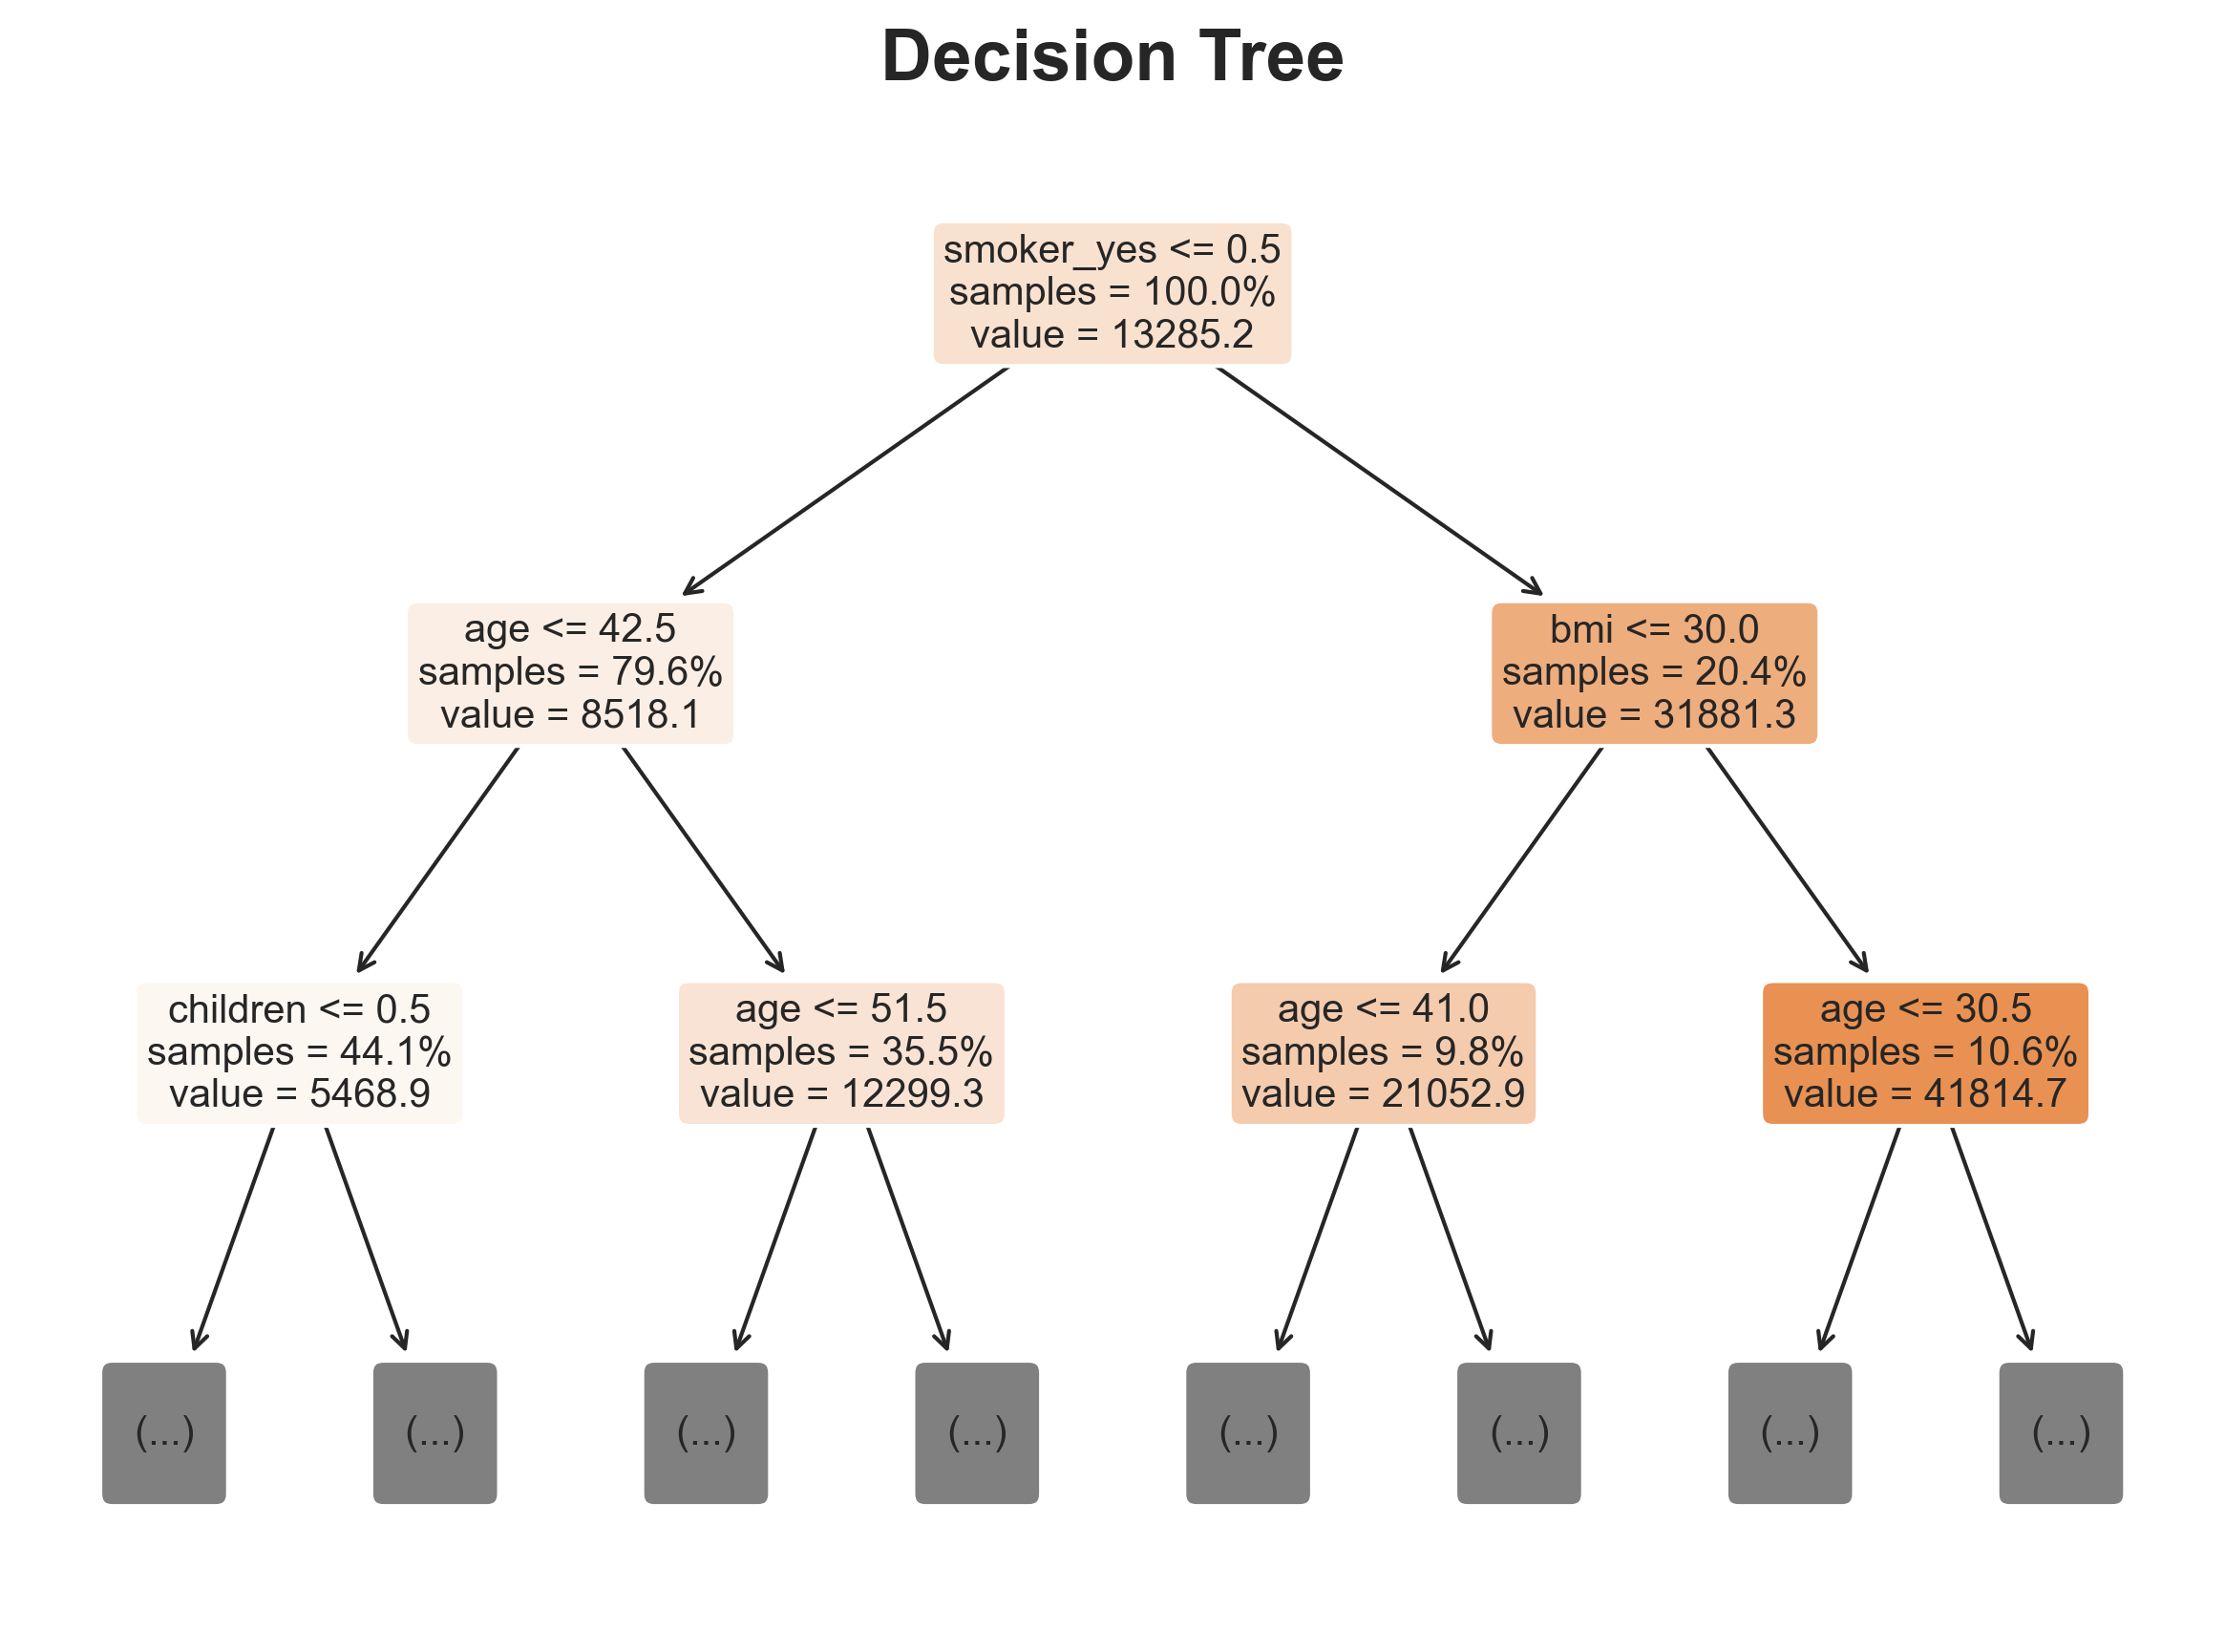

In [ ]:
feature_names = rnd_decision_tree.best_estimator_["columntransformer"].get_feature_names_out()
pretty_names = [f.split("__")[-1] for f in feature_names]


fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

plot_tree(
     best_tree,
     max_depth=2,
     feature_names=pretty_names,
     filled=True,
     rounded=True,
     fontsize=10,
     proportion=True, # show % of samples instead of counts
     impurity=False, # hide squared_error
     precision=1, # shorter numbers
     ax=ax
     
)

plt.title("Decision Tree", fontsize=18, weight="bold")
plt.tight_layout()

save_fig("Decision_Tree_plot_small")


### RandomForestRegressor

In [301]:
rfr = make_pipeline(tree_preprocessing, RandomForestRegressor())

In [305]:
base_random_forest_score = -cross_val_score(rfr, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")

In [306]:
pd.Series(base_random_forest_score).describe()

count       5.000000
mean     4877.139833
std       293.198791
min      4441.898586
25%      4733.486913
50%      4949.047954
75%      5123.462899
max      5137.802811
dtype: float64

In [304]:

param_grid = {
    "randomforestregressor__n_estimators": range(50,200),
    "randomforestregressor__max_depth": range(2,40),
    "randomforestregressor__min_samples_split": range(2,10),
    "randomforestregressor__min_samples_leaf": range(1,10),
    "randomforestregressor__max_features": ["sqrt", "log2", None]
}

rnd_forest = RandomizedSearchCV(rfr, param_distributions=param_grid, n_iter=100, scoring="neg_root_mean_squared_error", random_state=42)

rnd_forest.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x00000269760A4AD0>),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncod...
                   n_iter=100,
                   param_distributions={'randomforestregressor__max_depth': range(2, 40),
                                        'randomforestregressor__max_features': ['sqrt',
                                                                                'log2',
                                                                                None],
                                        'randomforestregressor__min_samples_leaf': range(1, 10),
                                        'randomforestregressor__min_samples_split': range(2, 10),
                                        'randomforestregressor__n_estimators': range(50, 200)},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [308]:
rnd_forest.best_params_

{'randomforestregressor__n_estimators': 58,
 'randomforestregressor__min_samples_split': 7,
 'randomforestregressor__min_samples_leaf': 3,
 'randomforestregressor__max_features': None,
 'randomforestregressor__max_depth': 5}

In [309]:
-rnd_forest.best_score_

4621.142167648941

In [311]:
random_forest_score = -cross_val_score(rnd_forest.best_estimator_, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")

In [321]:
pd.Series(random_forest_score).describe()

count       5.000000
mean     4616.455082
std       359.807740
min      4048.132168
25%      4533.837089
50%      4709.176946
75%      4786.871966
max      5004.257239
dtype: float64

### Comparing Models

In [357]:
# Training all models on the full training set and then predicting on the test set

models = [linear_reg, svr_tuned.best_estimator_, rnd_decision_tree.best_estimator_, rnd_forest.best_estimator_]
model_names = ["LinearRegression", "SVR", "DecisionTreeRegressor", "RandomForestRegressor"]

all_scores = {}

for name, model in zip(model_names, models):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    r2 = r2_score(y_test, y_pred)

    all_scores[name] = {"MAE": round(MAE,2), "MSE": round(MSE,2), "RMSE": round(RMSE,2), "R2": round(r2,2)}

df_model_comparison = pd.DataFrame(all_scores).T

In [358]:
df_model_comparison.index.name = "Models"

In [396]:
df_model_comparison

,MAE,MSE,RMSE,R2
Models,,,,
LinearRegression,4092.36,31333268.50,5597.61,0.79
SVR,3373.30,37706594.68,6140.57,0.75
DecisionTreeRegressor,2755.59,21655894.86,4653.59,0.86
RandomForestRegressor,2459.69,18958974.55,4354.19,0.88


In [360]:
df_model_comparison.to_csv("data/model_comparison_metrics.csv")

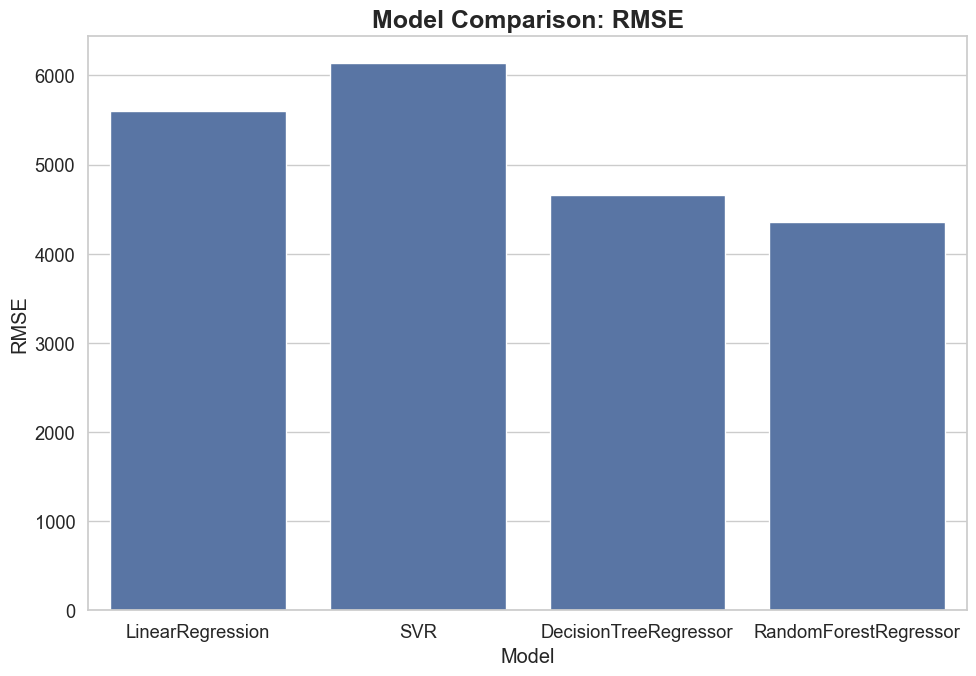

In [418]:
# comparing RMSE across all models

plt.figure(figsize=(10,7))
sns.barplot(data=df_model_comparison, x="Models", y="RMSE")
plt.title("Model Comparison: RMSE", fontsize=18, weight="bold")
plt.xlabel("Model")
plt.ylabel("RMSE")
#plt.ylim(0,1)

plt.tight_layout()

save_fig("RMSE_score")

In [412]:
# Normalize so that lowest RMSE → 1, highest → 0
rmse_norm = 1 - (df_model_comparison["RMSE"] - df_model_comparison["RMSE"].min()) / (df_model_comparison["RMSE"].max() - df_model_comparison["RMSE"].min())

In [414]:
rmse_norm

Models
LinearRegression         0.303944
SVR                      0.000000
DecisionTreeRegressor    0.832398
RandomForestRegressor    1.000000
Name: RMSE, dtype: float64

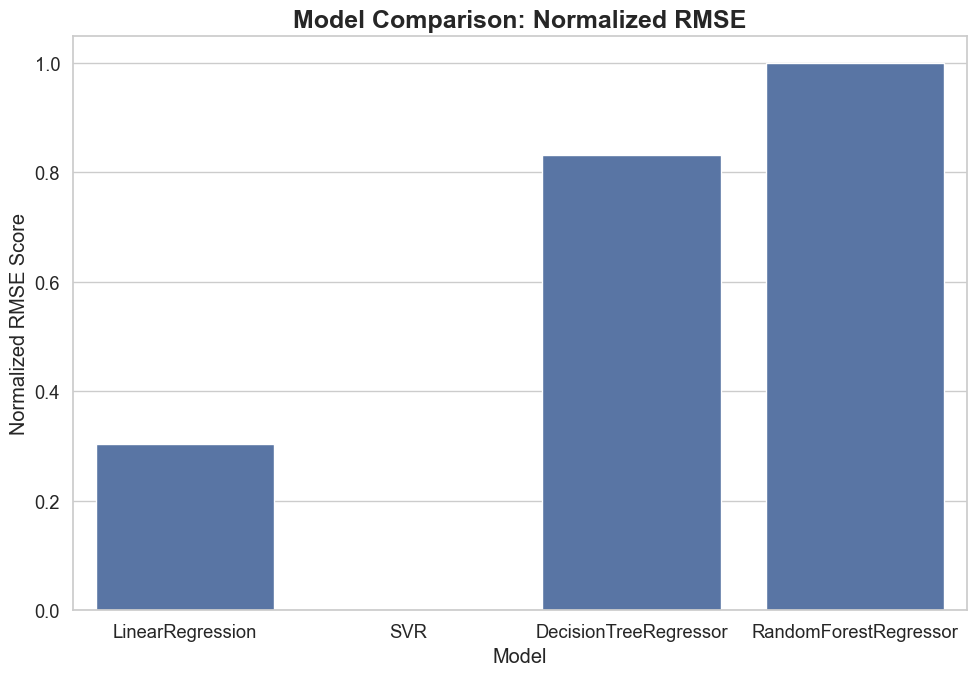

In [417]:
# comparing RMSE across all models

plt.figure(figsize=(10,7))
sns.barplot(data=df_model_comparison, x="Models", y=rmse_norm)
plt.title("Model Comparison: Normalized RMSE", fontsize=18, weight="bold")
plt.xlabel("Model")
plt.ylabel("Normalized RMSE Score")
#plt.ylim(0,1)

plt.tight_layout()

save_fig("RMSE_score_norm")

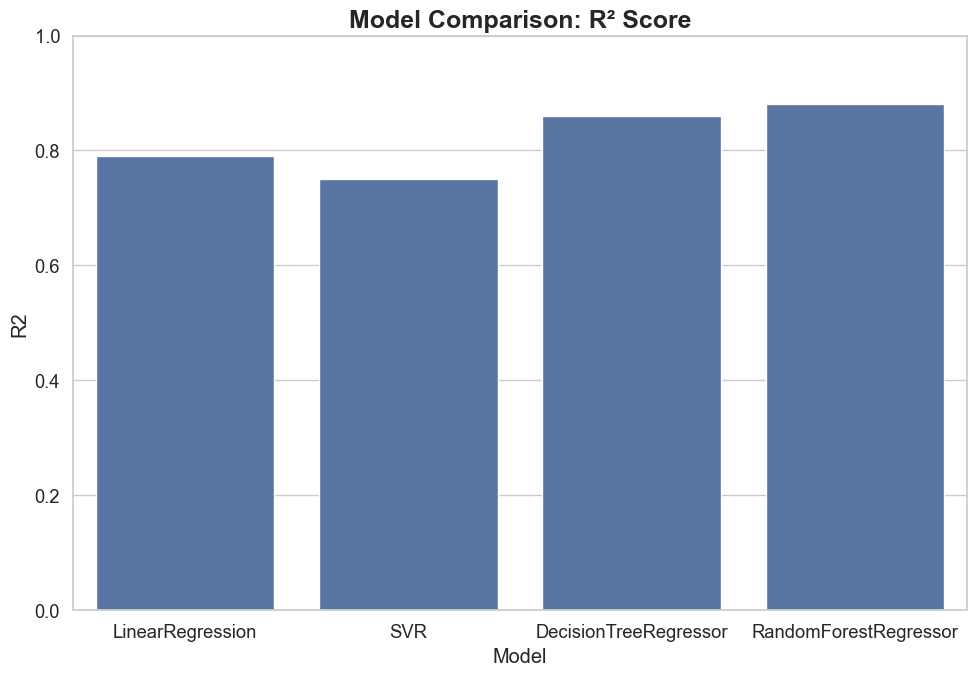

In [419]:
# comparing R2 score across all models

plt.figure(figsize=(10,7))
sns.barplot(data=df_model_comparison, x="Models", y="R2")
plt.title("Model Comparison: R² Score", fontsize=18, weight="bold")
plt.xlabel("Model")
plt.ylabel("R2")
plt.ylim(0,1)

plt.tight_layout()

save_fig("R2_score")